In [1]:
# Import the packages
import numpy as np

import requests
import re
import shutil
import pandas as pd
import numpy as np
import lxml
import os
import spacy 
import shutil
import urllib.request, urllib.error, urllib.parse
import csv
import heapq
import nltk
import math

from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen as uReq
from langdetect import detect
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from collections import defaultdict

In [2]:
nlp=spacy.load('en_core_web_sm')

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marco\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
driver = webdriver.Chrome(executable_path='/Users/marco/OneDrive/Desktop/chromedriver')
#driver = webdriver.Chrome(executable_path='/Users/faranakalikhah/Desktop/chromedriver')

## 1 Data Collection

#### 1.1 Get the list of Books

The first step of our analysis is to get the url for the first 300 pages in the website "goodreads.com". \
In order to complete this task, we have decided to create a function, called "getSearchResults", which save in a .txt file the URL for the first 300 pages.

In [3]:
# Function to save the url for the select page
def getSearchResults(Page):
    """
    Input:
        - Page: the page's URL we want to collect
    Output:
        - 'Page.txt': the text file contain the URL of the page
    """
    startValue = 0
    # splt the URL
    for page in range(1, Page + 1):

        url = 'https://www.goodreads.com/list/show/1.Best_Books_Ever?'
        url += '&page=' + str(page)
        
        #download the page and save the result
        response = urllib.request.urlopen(url)
        webContent = response.read()
        filename = 'Page' #+ str(page)
        f = open(filename + '.txt', 'a+')
        f.write('%s\n' % url)
        f.close

In [98]:
# Collect the 300 Pages
getSearchResults(300)

#### 1.2 Crawl Books

Now, we want to extract from each page the url of all the books on it. Then, we want to save the url of each book's title as an html file and put in the folder of the corresponding page. \
Therefore, we have decided to perform this task in two step:
- we build a function, called "url_book_list", which save in a text file the url for all the books in the selected pages. In our case, we want to find the url for the book in the first 300 pages, hence in the text file we have 30000 urls;
- we build a function, called "book_folder_html", which create a folder for each page. Each folder is called with "name-(# of page)". Inside each folder, there are the html file for each books called "aritcle_(# of book in the page)". In our case, we find 300 folder and each cointain 100 html file.

In [4]:
# The following function excract from a dataframe the element inside the corresponding webpage and 
# it put all together in a single .txt file
def url_book_list(url, df):
    """
    Input:
        - url: is the url of the interesting website
        - df: should be a .txt file obtained by the function "getSearchResults"
    Output:
        - 'book_list.txt': is a .txt file contain all the book's url
    """
    df = np.array(df)
    n = len(df)
    for i in df:
        URL_tolist = i.tolist() # trasform each element in a list
        URL_1 = URL_tolist[0] #select the the page
        Page = requests.get(URL_1)
        page = BeautifulSoup(Page.content)
        links = page.find_all('a','bookTitle')
        for link in links:
            fullLink = url + link.get('href')
            f = open('book_list.txt','a+')
            f.write('%s\n' %fullLink)
            f.close

In [5]:
url = 'https://www.goodreads.com'
path = %pwd
print(path)

C:\Users\marco\Algorithmic Methods of Data Mining\Homework\Homework 3


In [4]:
# Import the url of the first 300 pages
Page = pd.read_csv('Page.txt', sep='\ +', names=["Url"], header=None, engine='python')
df = np.array(Page)

In [ ]:
url_book_list(url, df)

Now, we need to save each book as html file and put in the folder of its page 

In [20]:
# Import the dataset contain the urls for all the books url
Book_list = pd.read_csv('book_list.txt', sep='\ +', names=["Url"], header=None, engine='python')
Book_list = np.array(Book_list)
# show the first 10 elements
Book_list[:10,:]

array([['https://www.goodreads.com/book/show/2767052-the-hunger-games'],
       ['https://www.goodreads.com/book/show/2.Harry_Potter_and_the_Order_of_the_Phoenix'],
       ['https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird'],
       ['https://www.goodreads.com/book/show/1885.Pride_and_Prejudice'],
       ['https://www.goodreads.com/book/show/41865.Twilight'],
       ['https://www.goodreads.com/book/show/19063.The_Book_Thief'],
       ['https://www.goodreads.com/book/show/170448.Animal_Farm'],
       ['https://www.goodreads.com/book/show/11127.The_Chronicles_of_Narnia'],
       ['https://www.goodreads.com/book/show/30.J_R_R_Tolkien_4_Book_Boxed_Set'],
       ['https://www.goodreads.com/book/show/11870085-the-fault-in-our-stars']],
      dtype=object)

In [3]:
len(Book_list)

30000

In [7]:
# Create a folder and save inside the book's title html

def book_folder_html(j, df, path):
    """
    Input:
        - j: the number of folder we want to build, in our case is equal to the number of page (300)
        - df: the dataset contain the book's url
        - path: current working directory
    Output:
        - 'page-#': the page with its corresponding number with inside the html for each book
    """
    rpath=path.replace("/","//")
    os.chdir(rpath)
    newfolder="page-"+str(j)
    os.makedirs(newfolder)
    start = (j - 1) * 100
    end = (j) * 100
    for i in range(start, end):
        Url = df[i]
        Url_1 = Url.tolist()
        Url_1 = Url_1[0]
        page = urllib.request.urlopen(Url_1)
        file_name = 'article_' + str((i + 1) - start) #Url_1[36:]
        completeName = os.path.join(rpath +"//"+"page-"+str(j), file_name)
        f = open(completeName + '.html', "wb")
        shutil.copyfileobj(page, f)
        f.close()


In [4]:
path=%pwd
for j in range(1,301):
    book_folder_html(j, Book_list, path)
    

In [8]:
# Count the element inside the folder in order to check
path_page = path + '/page-81'
num_files = len([f for f in os.listdir(path_page)if os.path.isfile(os.path.join(path_page, f))])
num_files

100

#### 1.3 Parse Download Pages

We want to extract the books informations. The list of information we desire for each book are the following:

 - Title (to save as bookTitle)
 - Series (to save as bookSeries)
 - Author(s), the first box in the picture below (to save as bookAuthors)
 - Ratings, average stars (to save as ratingValue)
 - Number of givent ratings (to save as ratingCount)
 - Number of reviews (to save as reviewCount)
 - The entire plot (to save as Plot)
 - Number of pages (to save as NumberofPages)
 - Published (Publishing Date)
 - Characters
 - Setting
 - Url
 
In order to extract from each book the above information, we have decided to define for each features the corresponding function. Therefore, we have the functions: "title", "series", "authors", "rate_value", "rate_count", "rev_count", "description", "num_page", "pubblish_date", "char_name" and "setting".\
When we do not have the plot in english we write that the book is not in english in the .tsv file for each book. The same reason is valid for all the other features, therefore - for example - if the Authors is not specified in the html page, we will write "NotSpecified" in the .tsv file; and so on. 

In [3]:
# Define the set of function in order to extract the book informations

# 1) Find the TITLE
def title(soup_page):
   
    bookTitle = soup_page.find_all('h1')[0].contents[0].replace('\n', '').strip()  
    if len(bookTitle)==0:
        bookTitle=str()
    return(bookTitle)        

# 2) Find the BOOK SERIES
def series(soup_page):
    
    if soup_page.find_all('a',{"class": "greyText"})==[]:
        bookSeries="NotSpecified"
    else:
        bookSeries=bookSeries = soup_page.find_all('a',{"class": "greyText"})[0].contents[0].replace("\n"," ").strip().replace("(","").replace(")","")
    
        if len(bookSeries)==0:
            bookSeries=str()
                
    return(bookSeries)

# 3) Find the AUTHORS
def authors(soup_page):
    if soup_page.find_all('span',itemprop="name")==[]:
        book_Authors="NotSpecified" #case in which in the page the authors is not specified
    else:
        book_Authors=soup_page.find_all('span',itemprop="name")
        bookAutors=book_Authors[0].contents[0].replace('\n',' ').strip()
    
        if len(bookAutors)==0:
            bookAutors=str()
        
    return(bookAutors)
        

# 4) Find the RATING for each book
def rate_value(soup_page):
    if soup_page.find_all('span',itemprop="ratingValue")==[]:
        rating_Value="NotSpecified"
    else:
        rating_Value=soup_page.find_all('span',itemprop="ratingValue")
    #ratingValue=float(rating_Value[0].contents[0].replace("\n","").split()[0])
        ratingValue=rating_Value[0].contents[0].replace("\n","").split()[0]
    
        if len(str(ratingValue))==0:
            ratingValue=str()
        
    return(ratingValue)


# 5) Find the NUMBER of RATING COUNT for each book   
def rate_count(soup_page):
    if soup_page.find_all('a', href="#other_reviews")==[]:
        rating_Count="NotSpecified"
    else:
    
        rating_Count=soup_page.find_all('a', href="#other_reviews")
        ratingCount=int(rating_Count[0].contents[-1].replace('\n',' ').strip().split()[0].replace(',',''))
    
        if len(str(ratingCount))==0:
            ratingCount=str()
        
    return(ratingCount)
        
      
# 6) Find the NUMBER of REVIEW for each book
def rev_count(soup_page):
    if soup_page.find_all('a', href="#other_reviews")==[]:
        review_Count="NotSpecified"
    else:    
        review_Count=soup_page.find_all('a', href="#other_reviews")
        reviewCount=int(review_Count[1].contents[-1].replace('\n',' ').strip().split()[0].replace(',',''))
    
        if len(str(reviewCount))==0:
            reviewCount=str()
        
    return(reviewCount)
        
# 7) Find the PLOT for each book
def description(soup_page):
    if soup_page.find_all('div', id="description")==[]:
        description="NotSpecified"
    else:
    
        description=soup_page.find_all('div', id="description")[0].get_text()
        description=description.replace('\n','').strip()
        description=re.sub(r'([ \t]+)', ' ',description, flags=re.M)
    
        if description[-7:]=='...more':
            description=description[:-7]
        
        if len(description)==0:
            description=str()
        
        if detect(description)!='en':
            description='NotEnglish'
    
    return(description)

# 8) Find the NUMBER of PAGE for each book
def num_page(soup_page):
    if soup_page.find_all('span',itemprop="numberOfPages")==[]:
        NumberofPages='NotSpecified'
    else:
        NumberofPages=int(soup_page.find_all('span',itemprop="numberOfPages")[0].contents[0].replace('\n','').split()[0])
        
        if len(str(NumberofPages))==0:
            NumberofPages=str()
        
        
    return(NumberofPages)

# 9) Find the PUBLISHING DATA for each book
def publish_date(soup_page):
    publishingDate = soup_page.find_all("div", id = "details")[0].find_all("div", {"class" : "row"})
    if len(publishingDate) == 0:
        publishingDate = ""
    else:
        if len(publishingDate[0].find_all("span")) != 0:
            if len(publishingDate) == 1:
                publishingDate = ""
            else:
                publishingDate = publishingDate[1].contents[0].strip("\n ").split("\n")
        else:
            publishingDate = publishingDate[0].contents[0].strip("\n ").split("\n")
        if len(publishingDate) <= 1:
            publishingDate = ""
        else:
            publishingDate = publishingDate[1].strip()

    return(publishingDate)



# 10) Find the CHARACTERS NAME for each book
def char_name(soup_page):
    if soup_page.find_all('div',{'class':'infoBoxRowItem'})==[]:
        characters="NotSpecified"
    else:
    
        characters=soup_page.find_all('div',{'class':'infoBoxRowItem'})
        #re.sub(r'([ \t]+)', ' ',characters, flags=re.M)
        a=str(characters).split(' ')
        target=list()
    
        for c in a:
        
            if c[:17]=='href="/characters':
                tar=''.join(c)
                target.append(tar)

        for i in range (len(target)) :
        
            a=str(target[i])
            start=a.find('-')
            sub=a[(start+1):] 
            mid=sub.find('-')
            subsub=sub[(mid)+1:]
            end=subsub.find('"')
            target[i]=a[(start+1):(end+mid+start)+2]
        
    return(str(target))

# 11) Find the SETTING for each book
def setting(soup_page):
    if soup_page.find_all('div',{'class':'infoBoxRowItem'})==[]:
        setting="NotSpecified"
    else:
    
        setting=soup_page.find_all('div',{'class':'infoBoxRowItem'})
        b=str(setting).split(' ')
        target=list()
    
        for c in b:
        
            if c[:13]=='href="/places':
                tar=''.join(c)
                target.append(tar)

        for i in range (len(target)) :
        
            a=str(target[i])
            start=a.find('-')
            sub=a[(start+1):] 
            end=sub.find('"')
            target[i]=a[(start+1):(end+start)+1]
        
    return(target)

Finally, we can collect from the list of books the information that we desired. \
Since, some books could not be open throught their html, we have decided to print for this kind og book the following message: "Unexpected Broken File". \
Since, we have 300 pages, we decided to run the function every 100 pages. In this way, we can see in a better way which file is broken (more information could be found in the .txt file called "Broken_File")

- From page 1 to 100

In [5]:
# to reduce the run time of the previous loop 
# to save correspondong information of each html file I decided to work eith another loop
urls_list = list(open("book_list.txt", "r"))
broken_file = []
for i in range(100):# going throu different page and corresponding folder
    
    path=%pwd
    rpath=path.replace("/","//")
    os.chdir(rpath)
    for n in range(100):
        
        tsvFile_name="article_"+str(n+1)+".tsv"
        htmlFile_name="article_"+str(n+1)+".html"
    
        htmlPathName = os.path.join(rpath+"\\"+"page-"+str(i+1), htmlFile_name)
        tsvPathName =os.path.join(rpath+"\\"+"page-"+str(i+1), tsvFile_name)
    
        with open(htmlPathName, encoding="utf-8") as htmlPathName:
        
                soup_page = BeautifulSoup(htmlPathName, features='lxml')
            
                if description(soup_page)=='NotEnglish' :
                    #os.remove(rpath + "\\" + "page-" + str(i+1) + "/" + "article_" + str(i+1) + ".html")
                    n=n+1
                else:
                    try:
                        #TITLE
                        bookTitle = soup_page.find_all("h1", id = "bookTitle")[0].contents[0].strip()
                        with open(tsvPathName, 'wt', encoding="utf-8") as tsvPathName:

                            tsv_writer = csv.writer(tsvPathName, delimiter='\t', dialect="excel", lineterminator="\n")
                            firstRow=['bookTitle','bookSeries','bookAuthors','ratingValue','ratingCount',
                                      'reviewCount','plot','NumberofPages','publish','characters','setting', 'URL_address']
                            tsv_writer.writerow(firstRow)

                            secondRow=[title(soup_page),series(soup_page),
                                       authors(soup_page),rate_value(soup_page),rate_count(soup_page),
                                       rev_count(soup_page),description(soup_page),num_page(soup_page),publish_date(soup_page),
                                       char_name(soup_page).replace('-',''),setting(soup_page),urls_list[(n+(i*100))]]
                            tsv_writer.writerow(secondRow)   
                            
                    except:
                        print(str(htmlFile_name)+ " Not Work")
                        broken_file.append(htmlFile_name)
                        continue      

article_89.html Not Work
article_4.html Not Work
article_66.html Not Work
article_56.html Not Work
article_32.html Not Work
article_69.html Not Work
article_82.html Not Work
article_43.html Not Work
article_24.html Not Work
article_42.html Not Work
article_95.html Not Work
article_88.html Not Work
article_76.html Not Work
article_7.html Not Work
article_34.html Not Work
article_80.html Not Work
article_13.html Not Work
article_98.html Not Work
article_76.html Not Work
article_16.html Not Work
article_26.html Not Work
article_73.html Not Work
article_59.html Not Work
article_39.html Not Work
article_11.html Not Work
article_61.html Not Work
article_69.html Not Work
article_100.html Not Work
article_13.html Not Work
article_28.html Not Work
article_43.html Not Work
article_66.html Not Work
article_67.html Not Work
article_21.html Not Work
article_47.html Not Work
article_74.html Not Work
article_22.html Not Work
article_39.html Not Work
article_88.html Not Work
article_82.html Not Work
a

 - From page 101 to 200

In [ ]:
# to reduce the run time of the previous loop 
# to save correspondong information of each html file I decided to work eith another loop
urls_list = list(open("book_list.txt", "r"))
broken_file = []
for i in range(100,200):# going throu different page and corresponding folder
    
    path=%pwd
    rpath=path.replace("/","//")
    os.chdir(rpath)
    for n in range(100):
        
        tsvFile_name="article_"+str(n+1)+".tsv"
        htmlFile_name="article_"+str(n+1)+".html"
    
        htmlPathName = os.path.join(rpath+"\\"+"page-"+str(i+1), htmlFile_name)
        tsvPathName =os.path.join(rpath+"\\"+"page-"+str(i+1), tsvFile_name)
    
        with open(htmlPathName, encoding="utf-8") as htmlPathName:
        
                soup_page = BeautifulSoup(htmlPathName, features='lxml')
            
                if description(soup_page)=='NotEnglish' :
                    #os.remove(rpath + "\\" + "page-" + str(i+1) + "/" + "article_" + str(i+1) + ".html")
                    n=n+1
                else:
                    try:
                        #TITLE
                        bookTitle = soup_page.find_all("h1", id = "bookTitle")[0].contents[0].strip()
                        with open(tsvPathName, 'wt', encoding="utf-8") as tsvPathName:

                            tsv_writer = csv.writer(tsvPathName, delimiter='\t', dialect="excel", lineterminator="\n")
                            firstRow=['bookTitle','bookSeries','bookAuthors','ratingValue','ratingCount',
                                      'reviewCount','plot','NumberofPages','publish','characters','setting', 'URL_address']
                            tsv_writer.writerow(firstRow)

                            secondRow=[title(soup_page),series(soup_page),
                                       authors(soup_page),rate_value(soup_page),rate_count(soup_page),
                                       rev_count(soup_page),description(soup_page),num_page(soup_page),publish_date(soup_page),
                                       char_name(soup_page).replace('-',''),setting(soup_page),urls_list[(n+(i*100))]]
                            tsv_writer.writerow(secondRow)   
                            
                    except:
                        print(str(htmlFile_name)+ " Not Work")
                        broken_file.append(htmlFile_name)
                        continue                    


article_1.html Not Work
article_84.html Not Work
article_8.html Not Work
article_75.html Not Work
article_13.html Not Work
article_45.html Not Work
article_25.html Not Work
article_46.html Not Work
article_87.html Not Work
article_49.html Not Work
article_38.html Not Work
article_15.html Not Work
article_9.html Not Work


 - From page 201 to 300

In [ ]:
# to reduce the run time of the previous loop 
# to save correspondong information of each html file I decided to work eith another loop
urls_list = list(open("book_list.txt", "r"))
broken_file = []
for i in range(200,300):# going throu different page and corresponding folder
    
    path=%pwd
    rpath=path.replace("/","//")
    os.chdir(rpath)
    for n in range(100):
        
        tsvFile_name="article_"+str(n+1)+".tsv"
        htmlFile_name="article_"+str(n+1)+".html"
    
        htmlPathName = os.path.join(rpath+"\\"+"page-"+str(i+1), htmlFile_name)
        tsvPathName =os.path.join(rpath+"\\"+"page-"+str(i+1), tsvFile_name)
    
        with open(htmlPathName, encoding="utf-8") as htmlPathName:
        
                soup_page = BeautifulSoup(htmlPathName, features='lxml')
            
                if description(soup_page)=='NotEnglish' :
                    #os.remove(rpath + "\\" + "page-" + str(i+1) + "/" + "article_" + str(i+1) + ".html")
                    n=n+1
                else:
                    try:
                            #TITLE
                        bookTitle = soup_page.find_all("h1", id = "bookTitle")[0].contents[0].strip()
                        with open(tsvPathName, 'wt', encoding="utf-8") as tsvPathName:

                            tsv_writer = csv.writer(tsvPathName, delimiter='\t', dialect="excel", lineterminator="\n")
                            firstRow=['bookTitle','bookSeries','bookAuthors','ratingValue','ratingCount',
                                          'reviewCount','plot','NumberofPages','publish','characters','setting', 'URL_address']
                            tsv_writer.writerow(firstRow)

                            secondRow=[title(soup_page),series(soup_page),
                                           authors(soup_page),rate_value(soup_page),rate_count(soup_page),
                                           rev_count(soup_page),description(soup_page),num_page(soup_page),publish_date(soup_page),
                                           char_name(soup_page).replace('-',''),setting(soup_page),urls_list[(n+(i*100))]]
                            tsv_writer.writerow(secondRow)   

                    except:
                        print(str(htmlFile_name)+ " Not Work")
                        broken_file.append(htmlFile_name)
                        continue                    


article_52.html Not Work
article_60.html Not Work
article_43.html Not Work
article_88.html Not Work
article_40.html Not Work
article_12.html Not Work
article_59.html Not Work
article_11.html Not Work


We have a total amount of broken file equal to 71 for all the 30000 book's htmls

## 2 Search Engine 

Now, we want to create two different Search Engines that, given as input a query, return the books that match the query. \
The first step is to remove from our data all the stopwords, punctuation, and stemming. To achieve this task we decided to create a function, called "stemmer".

In [4]:
# this function get text as input and return stemmed version of the text before deleting stop word and punctuations:
def stemeer(text):
    
    text_manipulate = text.replace('!',' ').replace(',',' ').replace('-',' ').replace('?',' ').replace('.',' ').replace('’',' ').replace('—',' ').replace('\'',' ').replace(':',' ').replace('\xa0','').replace('(','').replace(')','').replace('"','').replace('...','').replace('"','')
    text_s = ""
    for w in str(text_manipulate).split(' '):# delete single words
        if len(w) > 1:
            text_s = text_s + " " + w
            
    stemmed_text=text_s
 
    return(stemmed_text)

#### 2.1 Conjunctive query

Here, we will evaluate the queries only with respect to the book's plot. \
The first step for our analysis is to create an index in which we maps each word to an integer. 

In [5]:
# creating Vocabulary file :
# to increase the speed we use the available descriptions in .tsv files for each book
lancaster = LancasterStemmer()
term_id = 0
vocabulary_1 = dict()
for i in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    for n in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(n+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(i+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
        except:
            continue

        file_form = csv.reader(file, delimiter="\t")

        table = list(file_form)

        description = table[1][6]
        
        # before creating term_id we stem the description
        descrip_manipulate = stemeer(description)
        
        text_m = nlp(str(descrip_manipulate))
        #eliminating punctuations and stop words
        #since we want to stem it in next step it is better to hae list of tokens 
        token_list = []
        # stemming tokens and construct list:            
        for token in text_m:
                    
            if not token.is_stop and not token.is_punct:
                token_list.append(lancaster.stem(str(token)))
   # each word in each document related to unique number wich we call it term id of word 
   # same word does not related to different numbers and any two word have same corresponding id wich is in form of numbers
                
                
        token_list=token_list[1:]
        for key  in  token_list:
            if key not in vocabulary_1:
                vocabulary_1[key] = term_id
                term_id += 1
        

In [ ]:
########################### WARNING : SAVE THIS VOCABULARY DICTIONARY ##################
# file = open("vocabulary_1.txt", "w")
# file.write(str(vocabulary_1))
# file.close()
########################### WARNING ##############
# we can also do it in pickle format file 
# import _pickle as cPickle 
# a_file = open("vocabulary_1.pkl", "wb")
# pickle.dump(my_dict, a_file)
# a_file.close()

# a_file = open("vocabulary_1.pkl", "rb")
# output = pickle.load(a_file)
# print(output)
# a_file.close()

Now for each term id we define the corresponding dictionary which have values equal to the documents that include this term id. 

In [ ]:
my_dict = defaultdict(list)
for i in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    for n in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(n+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(i+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
        except:
            continue

        file_form = csv.reader(file, delimiter="\t")

        table = list(file_form)

        description = table[1][6]  # extract corresponding column that include description 
        
        # before creating term_id we stem the description
        descrip_manipulate = stemeer(description)
        
        text_m = nlp(str(descrip_manipulate))
        #eliminating punctuations and stop words
        #since we want to stem it in next step it is better to hae list of tokens 
        token_list = []
        
        for token in text_m:
                    
            if not token.is_stop and not token.is_punct:
                token_list.append(lancaster.stem(str(token)))
                
# for each token available in vocabulary we create dictionary with key equal to term id of that word 
# in vocabulary and corresponding document that include that word  
# so each key of dictionary can have more that one value because same word can represent in different documents

        token_list=token_list[1:]       
        for key in token_list:
            
            term_id = vocabulary_1[key]
            my_dict[term_id].append( 'document_'+str( ( (i)*100)+n+1) ) ##?? should we delete first element??##
            
# import _pickle as cPickle 
# a_file = open("Dictionary.pkl", "wb")
# pickle.dump(my_dict, a_file)
# a_file.close()

Finally, we define our search engine function, called "search_engine", in which we get a query as input and the output is list of documents that include all words of query in the plot.

In [13]:
# this function get the query as input and represent list of documents that include all words of query
def search_engine():


    context = input()
        # stemming the input
    if len(context)>=2 :
        context_manipulated = stemeer(context)
        mp_context = nlp(context_manipulated)
        token_list=[]
        context_list = []

        for token in mp_context:
            if not token.is_stop and not token.is_punct:
                token_list.append(lancaster.stem(str(token)))



        token_list=token_list[1:]
        # finding corresponding documents for each word of documents 
        for token in token_list:
            term_id = vocabulary_1[lancaster.stem(str(token))]
            context_list.append(set(my_dict[term_id]))

    
     # if length of query is more that one word we will intersect between common documents among all words 
        if len(context_list)>=1:
            if len(context_list) >= 2:

                for i in range(len(context_list)-1):

                    for j in range(i+1,len(context_list)):
                        intersect = context_list[i].intersection(context_list[j])
                        main_list = list(intersect)

            else:

                intersect = context_list[0].intersection(context_list[0])
                main_list = list(intersect)


            if len(main_list)>=1:
                num = []
                for k in range(len((main_list))) :

                    a = main_list[k]
                # extracting the number of each documents to find their address     

                    num.append([s for s in re.findall(r'-?\d+\.?\d*', a)])  
                ##### now we are creating the columns of our table : ####
                book_title = []
                plot = []
                url = []

                for i in range(len(num)):

                    adress = int(num[i][0])
                    page_index = (adress//100)+1 # finding corresponding folder 
                    book_index = adress%100      # finding corresponding document in above folder 

                    path = %pwd
                    rpath = path.replace("/","//")
                    os.chdir(rpath)

            # create proper path to open corresponding .tsv file:

                    tsvFile_name = "article_"+str(book_index)+".tsv"
                    tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name) 

                    file = open(tsvPathName, "r", encoding="utf-8")
                    file_form = csv.reader(file, delimiter="\t")

                    table = list(file_form)

                    plot.append('...')
                    book_title.append(table [1][0])  # extract row and columns that includes book's name 
                    url.append(table [1][-1])        # extract corresponding url which is at second row and lst columns

                    c1 = pd.DataFrame({'bookTitle': book_title})
                    c2 = pd.DataFrame({'plot': plot })
                    c3 = pd.DataFrame({'url': url})
                    c1 = pd.concat([c1,c2, c3],axis=1)

            # print proper table that include information of documents that include all the words of query
                return(c1.style.set_table_styles([{'selector':'','props':[('border','2px solid #8a8')]}]))
            else:
                return(print('THERE IS NO PROPER RESULT THAT INCLUDE ALL WORDS OF INPUT'))
        else:
            return(print('THERE IS NO PROPER RESULT THAT INCLUDE ALL WORDS OF INPUT '))
    else:
        return(print('PLEASE TYPE AT LEAST ONE COMPLETE MEANINGFUL WORD '))

    
search_engine()

 survival games


,bookTitle,plot,url
0,The Wide Game,...,https://www.goodreads.com/book/show/18160656-the-wide-game
1,The Dark Calling,...,https://www.goodreads.com/book/show/31453592-the-dark-calling
2,The Rescue,...,https://www.goodreads.com/book/show/41632412-the-rescue
3,The Ballad of Songbirds and Snakes,...,https://www.goodreads.com/book/show/51901147-the-ballad-of-songbirds-and-snakes
4,The Traitor Baru Cormorant,...,https://www.goodreads.com/book/show/23444482-the-traitor-baru-cormorant
5,The Elephant Whisperer,...,https://www.goodreads.com/book/show/6375561-the-elephant-whisperer
6,Mud Vein,...,https://www.goodreads.com/book/show/18246727-mud-vein
7,The Water Knife,...,https://www.goodreads.com/book/show/23209924-the-water-knife
8,The Calling,...,https://www.goodreads.com/book/show/20510241-the-calling
9,Mass Effect: Retribution,...,https://www.goodreads.com/book/show/7552700-mass-effect


It is important to point out that in our function ("search_engine") we use the intersection method to find which documents contain the query input. So when we go to get the results our function does not put the books in a predetermined order but they are shown without any preference as we can see in the table above.

#### 2.2 Conjunctive query & Ranking score


For the second search engine, given a query, we want to get the top-k documents related to the query. In particular, we want:

 - find all the documents that contains all the words in the query;
 - sort them by their similarity with the query;
 - Return in output k documents, or all the documents with non-zero similarity.
 

Our starting point is to define a function, called "unique_list", which delate all the replications.  After that, we create a vocabulary file

We need to define new dectionary in which each value is a tuple of document address and it corresponding tf_idf of key is in that document. Therefore, we can also use the previous vocabluary. First, we need to define a new dictionary in which the values of term frequencies are shown for each document. Then, we define each document as a number while in previous part we define it as string, for example 'document_i'.

In [15]:
# to delete replications :
def unique_list(token_list):
    
    ulist = []
    [ulist.append(x) for x in token_list if x not in ulist]
    
    return ulist

In [16]:
# creating Vocabulary file :
# to increase the speed we use the available descriptions in .tsv files for each book
lancaster = LancasterStemmer()
term_id = 0
vocabulary = dict()
for i in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    for n in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(n+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(i+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
        except:
            continue

        file_form = csv.reader(file, delimiter="\t")

        table = list(file_form)

        description = table[1][6]
        
        # before creating term_id we stem the description
        #descrip_manipulate = stemeer(description)
        
        text_m = nlp(description)
        #eliminating punctuations and stop words
        #since we want to stem it in next step it is better to hae list of tokens 
        token_list = []
                     
        for token in text_m:
                    
            if not token.is_stop and not token.is_punct:
                token_list.append(lancaster.stem(str(token)))
                                          

        for key  in  token_list:
            if key not in vocabulary:
                vocabulary[key] = term_id
                term_id += 1

In [ ]:
########################### WARNING : SAVE THIS VOCABULARY DICTIONARY ##################
# file = open("vocabulary.txt", "w", encoding="utf-8")
# file.write(str(vocabulary))
# file.close()
########################### WARNING ##############
# we can also do it in pickle format file 
# import _pickle as cPickle 
# a_file = open("vocabulary.pkl", "wb", encoding="utf-8")
# pickle.dump(my_dict, a_file)
# a_file.close()

# a_file = open("vocabulary.pkl", "rb", encoding="utf-8")
# output = pickle.load(a_file)
# print(output)
# a_file.close()

In [17]:
#### calculating Inverse Document Frequency:
DF = {}
IDF = {}
for page in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    for item in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(item+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(page+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
        except:
            continue

        file_form = csv.reader(file, delimiter="\t")

        table = list(file_form)

        description = table[1][6]
        
        # before creating term_id we stem the description
        # descrip_manipulate = stemeer(description)
        
        text_m = nlp(description)
        #eliminating punctuations and stop words
        #since we want to stem it in next step it is better to hae list of tokens 
        token_list = []
        
        for token in text_m:
                    
            if not token.is_stop and not token.is_punct:
                if lancaster.stem(str(token)) in vocabulary:
                    term_id = vocabulary[lancaster.stem(str(token))]
                    if term_id not in DF :
                        DF[term_id] = 1
                    else:
                        DF[term_id] += 1
                else :
                    continue
                    
for items in DF:
    if items not in IDF:
        IDF[items] = round(math.log(page*100 / DF[items]))
        

# import _pickle as cPickle 
# a_file = open("IDF.pkl", "wb", encoding="utf-8")
# pickle.dump(my_dict, a_file)
# a_file.close()


The following dictionary follows the same rules as the previous one. However, it not only includes the corresponding documents for each term id but it also represents the tf_idf of word. \
The IDF term is unique and independent for each book and for each word becasue it just depends on bank of descreptions. On the other hand, tf_idf include the number of times that a word repeated in specific document it is not unique for each word and change through different documents. Therefore, each term id has different tuples that incluce document that has term id and its corresponfig tf_idf.


In [18]:
global_dict=defaultdict(list)
for page in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    
    counter_dict={}
    for item in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(item+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(page+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
        except:
            continue

        file_form = csv.reader(file, delimiter="\t")

        table = list(file_form)

        description = table[1][6]
        

        
        text_m = nlp(description)
 
        token_list = []
        
        for token in text_m:
                    
            if not token.is_stop and not token.is_punct:
                
                if lancaster.stem(str(token)) in vocabulary:
                    term_id = vocabulary[lancaster.stem(str(token))]
                    token_list.append(lancaster.stem(str(token)))
                    
                    if term_id not in counter_dict:
                        counter_dict[term_id] = 1
                    else:
                        counter_dict[term_id] += 1
                else :
                    continue 
                    
         # define global dict :
        lenght = len(token_list)
        
        for key in unique_list(token_list):
            if key in vocabulary:
                
                term_id = vocabulary[key]
                if term_id not in global_dict:
                    global_dict[term_id] = []
            
            
                score = (counter_dict[term_id]/lenght+1)*(IDF[term_id])
                refrence = ((page)*100)+item+1
                if [refrence, score] not in global_dict[term_id]:
                    global_dict[term_id].append([refrence, score])
             
            else:
                continue
        
        
        
        
                
# import _pickle as cPickle 
# a_file = open("global_dict.pkl", "wb", encoding="utf-8")
# pickle.dump(my_dict, a_file)
# a_file.close()
##############################WARNING #############################
# if you got error you should run 
# vocabulary.pop(' ')



In order to define the similarity among all the books, we want to use the cosine similarity. Therefore, we define a function which computes the cosine similarity for each books in our list. 

In [19]:
def cosine_similarity(refrence, query):
    
    query = set(nltk.word_tokenize(query))
    
    Q_w = []
    D_w = []
    
    i = 1
    for word in query:
        Q_w.append(1)
        D_w.append(refrence[i])
        i = i+1
        
    intersect = 0
    
    # cosine formula  
    for i in range(len(query)): 
        intersect += Q_w[i]*D_w[i] 
        
    Q_w = [tfidf**2 for tfidf in Q_w]
    D_w = [tfidf**2 for tfidf in D_w]
    
    cosine_similarity = intersect / (sum(Q_w)*sum(D_w))**0.5
    
    return cosine_similarity

The following function get in input a query, the vocabulary and the dictionary and return the list of documents that contains all the words in the query and the tfidf value of each word. This function return a table that represent information of documents that includes all word of query in their own plots and the percentage of the similarity between query and represented book. In order to calculate similarity we used cosine_similarity dunction defined above and we also used heap method to sort the result based on similarity of books and query. 


In [33]:
def global_search_engine (query,K=20):
    
    if len(query)>=2 :
        token_lists = []
        context_list = []

        quary_m = nlp(query)

        for token in quary_m:
            if not token.is_stop and not token.is_punct:
                if lancaster.stem(str(token)) in vocabulary:
                    term_id = vocabulary[lancaster.stem(str(token))]
                    # create list that include manipulated version of word in quey
                    # this word change to its term id through vocabulary dict that we create
                    # then for corresponding term id we represent documents that include this term id 
                    # and corresponding tf_idf of term id
                    if term_id in global_dict:
                        context_list.append(global_dict[term_id])
                    else:
                        context_list.append([])
                else:
                    context_list.append([])


        result = []
        # we aim to get the intersection of results for each term ide 
        # to do this we use the method that we talked about during class
        
        # Initialize a list of indices, one for each list of documents so that I can scroll them
        len_list = len(context_list)
        # we represent list of indices and start from zero each index is related to component of context list this is why they
        # must have same length

        indices = [0]*len_list


        lists_len = [len(context) for context in context_list]
        run = True

        for doc in context_list:
            if doc == []:
                run = False

        while run:


            D_W = []
            D_WR = []
            for i in range(len_list):
                D_W.append(context_list[i][indices[i]][0])
                D_WR.append(context_list[i][indices[i]].copy())
        # accordign to structure of method to find intersection, we need at first compare the same indices if they were equal 
        # keep them and increase all by one, unless we compair all of them with maximum and index that correspond to least
        # amont will increase by one and again compare them we continue this process while we find new intersection or arrive
        # to the end of any of lists available in context list 
        
            max_D_W = max(D_W)
            satidfied = True
            for j in range(len(D_W)):
                if D_W[j] < max_D_W:
                    satidfied = False
                    indices[j] += 1
        # intersected result means each document include all the words of quey 
        # so we need create list that include document number and  tf_idf of ech word available in query in that quey 
        # this is why I used mt D_WR copy version to use second component of each tuple and create my apeal list 
        # for example if document1 is available in query and the qury includes 2 word we will have list with lenght 3 
        # firat element is document number second is tf_idf of first word and third component is tf_idf of second word in 
        # corresponding document 1 .
                    
            if satidfied:
                [D_WR[0].append(D_WR[x][1]) for x in range(1, len(D_WR))]
                result.append(D_WR[0])

                indices = [x+1 for x in indices]

                # Stop when one of the document lists is finished
            run = True
            for k in range(len(indices)):
                run = run and (indices[k] < lists_len[k])

        heap = []
        heapq.heapify(heap)
        book_title = []
        plot = []
        url = []
        simi = []
        for refrence in result:
            score = cosine_similarity(refrence, query)  # calculating the percentage of similarity  by cosine similarity
            refrence[0] = -refrence[0] # sort the result

                #Inserts in the head of the list the cosine distance 
            refrence.insert(0, score)
            heapq.heappush(heap, refrence)

            
            if K < len(heap):
                # get the firsts k largest element from the heap
                result = heapq.nlargest(K, heap)
            else:
                result = heapq.nlargest(len(heap), heap)

        if len(result)>=1:
            for refrence in result:

                simi.append(refrence[0])
                num = -refrence[1]
                adress = int(num)
                page_index = (adress//100)+1
                book_index = adress%100
        #     for refrence in result:
                path = %pwd
                rpath = path.replace("/","//")
                os.chdir(rpath)
                tsvFile_name = "article_"+str(book_index)+".tsv"
                tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name)    

                try: # if it exist open it 

                    file = open(tsvPathName, "r", encoding="utf-8")
                    file_form = csv.reader(file, delimiter="\t")

                    table = list(file_form)


                    plot.append('...')
                    book_title.append(table [1][0])
                    url.append(table [1][-1])


                    c1 = pd.DataFrame({'bookTitle': book_title})
                    c2 = pd.DataFrame({'plot': plot })
                    c3 = pd.DataFrame({'url': url})
                    c4 = pd.DataFrame({'Similarity' : simi })
                    c1 = pd.concat([c1,c2, c3 , c4 ],axis=1)


                except:
                    continue

            return(c1.style.set_table_styles([{'selector':'','props':[('border','2px solid #8a8')]}]))
        else:
            return('THERE IS NO PROPER RESULT ')
    else:
        return(print('Please type at leat one complete meaningfull word '))

        
        
global_search_engine (input(),K=20)

 survival games


,bookTitle,plot,url,Similarity
0,All I Really Need to Know I Learned in Kindergarten,...,https://www.goodreads.com/book/show/34760.All_I_Really_Need_to_Know_I_Learned_in_Kindergarten,0.990866
1,The Magus,...,https://www.goodreads.com/book/show/46756.Oryx_and_Crake,0.990398
2,Early Autumn,...,https://www.goodreads.com/book/show/69625.Early_Autumn,0.990045
3,The House of Shattered Wings,...,https://www.goodreads.com/book/show/23601046-the-house-of-shattered-wings,0.988372
4,Code Name Verity,...,https://www.goodreads.com/book/show/11925514-code-name-verity,0.988188
5,The Traitor Baru Cormorant,...,https://www.goodreads.com/book/show/23444482-the-traitor-baru-cormorant,0.98794
6,Silence is Golden,...,https://www.goodreads.com/book/show/31367949-silence-is-golden,0.987826
7,The Triple Goddess,...,https://www.goodreads.com/book/show/16110552-the-triple-goddess,0.987625
8,Bound by Honor,...,https://www.goodreads.com/book/show/51525075-bound-by-honor,0.987606
9,Red Glove,...,https://www.goodreads.com/book/show/8288246-red-glove,0.987339


## 3 Define a new score!

In this scenario, a single user can give in input more information than the single textual query, so you need to take into account all this information, and think a creative and logical way on how to answer at user's requests.

The user will enter a text query. As a starting point, get the query-related documents by exploiting the search engine of Step 3.1. Once you have the documents, you need to sort them according to your new score. In this step you won't have anymore to take into account just the plot of the documents, you must use the remaining variables in your dataset (or new possible variables).

The first step to define our new score is to build a function, called "title_importance", which search among documents that include all the words of quey in their own plot and then calculate how many percentage of book's name is available in the query in percentage.

In [23]:
def title_importance(refrence, query):
    
#     query='hunger games'
    #query = list(nltk.word_tokenize(query))
    query_m = nlp(query)
    query_list=[]
    for token in query_m:
        if not token.is_stop and not token.is_punct:
            query_list.append(lancaster.stem(str(token)))

    num =refrence[0]
    adress = int(num)
    page_index = (adress//100)+1
    book_index = adress%100
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    tsvFile_name = "article_"+str(book_index)+".tsv"
    tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name)    

    # try: # if it exist open it 
    file = open(tsvPathName, "r", encoding="utf-8")
    file_form = csv.reader(file, delimiter="\t")
    lines = list(file_form)
    title = lines[1][0]
    # #title_list = list(nltk.word_tokenize(title))
    title_m = nlp(title)
    title_list=[]
    for token in title_m:
        if not token.is_stop and not token.is_punct:
                title_list.append(lancaster.stem(str(token)))


    n = len(query_list)
    tb=len(title_list)
    repeat_num = 0

    for word in unique_list(query_list):
        if word in title_list:
            repeat_num += title_list.count(word)

    title_importance = 0
    if repeat_num != 0 and tb !=0:
        #title_importance =10*(math.exp(repeat_num/tb+1)/(n+1))
         title_importance =0.01+(repeat_num/tb)*(repeat_num/n)
#         A = math.factorial(tb)/((math.factorial(repeat_num))*math.factorial(tb-repeat_num)) # C(A,B)=(A!/B!(A-B)!)
#         B = math.factorial(n)/(math.factorial(repeat_num)*math.factorial(n-tb)) 
#         title_importance = (0.6)*(A)+(0.4)*(A/B)
    else:
        return 0
#     except:
#         return 0
    
    return title_importance

Then, we define another function, called "Author_importance", which follows the same reason as the previous function but this time we consider the Author name.

In [24]:
def Author_importance(refrence, query):
    
    query_m = nlp(query)
    query_list=[]
    for token in query_m:
        if not token.is_stop and not token.is_punct:
            query_list.append(lancaster.stem(str(token)))

    num =refrence[0]
    adress = int(num)
    page_index = (adress//100)+1
    book_index = adress%100
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    tsvFile_name = "article_"+str(book_index)+".tsv"
    tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name)    

    # try: # if it exist open it 
    file = open(tsvPathName, "r", encoding="utf-8")
    file_form = csv.reader(file, delimiter="\t")
    lines = list(file_form)
    Auter = lines[1][2]
    # #title_list = list(nltk.word_tokenize(title))
    Auter_m = nlp(Auter)
    Auter_list=[]
    for token in Auter_m:
        if not token.is_stop and not token.is_punct:
                Auter_list.append(lancaster.stem(str(token)))


    n = len(query_list)
    tb=len(Auter_list)
    repeat_num = 0

    for word in unique_list(query_list):
        if word in Auter_list:
            repeat_num += title_list.count(word)

    title_importance = 0
    if repeat_num != 0 and tb !=0:
        #title_importance =10*(math.exp(repeat_num/tb+1)/(n+1))
         title_importance =0.01+(repeat_num/tb)*(repeat_num/n)
#         A = math.factorial(tb)/((math.factorial(repeat_num))*math.factorial(tb-repeat_num)) # C(A,B)=(A!/B!(A-B)!)
#         B = math.factorial(n)/(math.factorial(repeat_num)*math.factorial(n-tb)) 
#         title_importance = (0.6)*(A)+(0.4)*(A/B)
    else:
        return 0
#     except:
#         return 0
    
    return Author_importance
    

Now, we have decided also to consider the maximum number of voters who participate to the vote among all the books.

In [25]:
counter_rating=[]
for page in range(0,300):# going throu different folders corresponding to pages page and corresponding folder
    
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    
    
   
    for item in range (100): # moving through .tsv files of coresponding page
        
        tsvFile_name = "article_"+str(item+1)+".tsv"

        tsvPathName = os.path.join(rpath+"//"+"page-"+str(page+1), tsvFile_name)
        
        try: # if it exist open it 
            file = open(tsvPathName, "r", encoding="utf-8")
            file_form = csv.reader(file, delimiter="\t")

            table = list(file_form)

            num_votters = table[1][4]
            counter_rating.append(int(num_votters))
        
        except:
            continue

        
MAX_votters = max(counter_rating)

In [26]:
MAX_votters

7115957

Then, we need to define a function for the importance of the review. Therefore, we calculate the percentage of rate (rate/5) as first thing. Then, we calculate the fraction maximum voters among all the books and the number of peopele who vote to that specific book. \
Hence, we can use it as the multiplier that represent the validity of voters. For example, consider a book with grade 4 and 40000 users, and consider a book with grade 5 and number of voters equal to 10. It is easy to realize that these two books are not comparable, therefore we need reliable fraction. 

In [27]:
####  function for importance of review :
def ranking_importance(refrence , max_votters=MAX_votters):
    
    num =refrence[0]
    adress = int(num)
    page_index = (adress//100)+1
    book_index = adress%100
    path = %pwd
    rpath = path.replace("/","//")
    os.chdir(rpath)
    tsvFile_name = "article_"+str(book_index)+".tsv"
    tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name)    

    # try: # if it exist open it 
    file = open(tsvPathName, "r", encoding="utf-8")
    file_form = csv.reader(file, delimiter="\t")
    lines = list(file_form)
    
    num_votters = lines[1][4]  # number of votters 
    
    grade = lines[1][3] # rate page
    
    

    if num_votters == str() or grade == str() :
        importance_ranking = 0
        
    else:
        # percentage of ranking:
        A = float(grade)/5
        # 
        B = (int(num_votters)/max_votters)
        
        importance_ranking = (0.3*(A)) + (0.7*(B))
#     except:
#         return 0
    
    return importance_ranking

Finally, we can define our search engine. This function get in input a query, the vocabulary and the dictionary and return the list of documents that contains all the words in the query and the tfidf value of each word.

In [34]:
def enhanced_search_engine (query,K=15):

    if len(query)>=2 :
        token_lists = []
        context_list = []

        quary_m = nlp(query)

        for token in quary_m:
            if not token.is_stop and not token.is_punct:
                if lancaster.stem(str(token)) in vocabulary:
                    term_id = vocabulary[lancaster.stem(str(token))]
                    # create list that include manipulated version of word in quey
                    # this word change to its term id through vocabulary dict that we create
                    # then for corresponding term id we represent documents that include this term id 
                    # and corresponding tf_idf of term id
                    if term_id in global_dict:
                        context_list.append(global_dict[term_id])
                    else:
                        context_list.append([])
                else:
                    context_list.append([])
        # we aim to get the intersection of results for each term ide 
        # to do this we use the method that we talked about during class

        result = []

            # Initialize a list of indices, one for each list of documents so that I can scroll them
        len_list = len(context_list)
        indices = [0]*len_list

        # calculate the length of list
        lists_len = [len(context) for context in context_list]
        run = True

        for doc in context_list:
            if doc == []:
                run = False

        while run:

        # we define two empty list: 
            D_W = [] # for documents without tf_idf
            D_WR = [] # include copy of documents and tf_idf
            for i in range(len_list):
                D_W.append(context_list[i][indices[i]][0])
                D_WR.append(context_list[i][indices[i]].copy())
                
                # accordign to structure of method to find intersection, we need at first compare the 
                # same indices if they were equal keep them and increase all by one, unless we compair 
                # all of them with maximum and index that correspond to least amount will increase by one 
                # and again compare them we continue this process while we find new intersection or arrive
                # to the end of any of lists available in context list 

            max_D_W = max(D_W)
            satidfied = True
            for j in range(len(D_W)):
                if D_W[j] < max_D_W:
                    satidfied = False
                    indices[j] += 1
                    # intersected result means each document include all the words of quey 
                    # so we need create list that include document number and  tf_idf of ech word available 
                    # in query in that quey this is why I used mt D_WR copy version to use second component 
                    # of each tuple and create my apeal list for example if document1 is available in query 
                    # and the qury includes 2 word we will have list with lenght 3 first element is document 
                    # number second is tf_idf of first word and third component is tf_idf of second word in 
                    # corresponding document 1.


            if satidfied:
                [D_WR[0].append(D_WR[x][1]) for x in range(1, len(D_WR))]
                result.append(D_WR[0])

                indices = [x+1 for x in indices]

                # Stop when one of the document lists is finished
            run = True
            for k in range(len(indices)):
                run = run and (indices[k] < lists_len[k])
                
                # as asked in question we use heap method to score the finding results of similarity  
                # to find the percentage of similarity we not only use cosine similarity but also calculate 
                # the percentage of similarity between book title and query, percentage of similarity between 
                # Author's name and query at last not least. We also consider the rate and relaiability of rate 
                # by fraction of votters for specific book and maximum number what is important here is that 
                # if we directly search book name we may not get book at our results because we search 
                # similarity of books name Authoras name and importance of rate among books that include all 
                # words of query in their own plot, this is why by doing this we are literaly increase the 
                # possibility of error but we followed the structure of question unless we should change our 
                # global dictionary and also add authors name and book names more than descriptions 
                # of votters among all books 
                

        heap = []
        heapq.heapify(heap)
        book_title = []
        plot = []
        url = []
        simi = []
        for refrence in result:
            similarity_percentage_plot = cosine_similarity(refrence, query)
            importance_title = title_importance(refrence,query)
            importance_ranking = ranking_importance(refrence , max_votters=7115957)
            importance_Auter = Author_importance(refrence, query)
            score_main = 0.25*importance_title + 0.6*(similarity_percentage_plot) + 0.05*(importance_ranking)+0.1*(importance_Auter)
            # in above commend we give weigths to similarities since dictionary is based on plot of books 
            # and intersections is # also based on plots we decided to give highest weigth to plot 
            # then to books name similarity because it is more probeble that book name repeated in plot 
            # that Authors name then we give least weigth to rate because these are all best books ever 
            # and almost all of them has good rate 
            
            refrence[0] = -refrence[0]

                #Inserts in the head of the list the cosine distance 
            refrence.insert(0, score_main)
            heapq.heappush(heap, refrence)





            if K < len(heap):
                # get the firsts k largest element from the heap
                result = heapq.nlargest(K, heap)
            else:
                result = heapq.nlargest(len(heap), heap)

        if len(result) >=1:
            for refrence in result:

                simi.append(refrence[0])
                num = -refrence[1]
                adress = int(num)
                page_index = (adress//100)+1
                book_index = adress%100

                path = %pwd
                rpath = path.replace("/","//")
                os.chdir(rpath)
                tsvFile_name = "article_"+str(book_index)+".tsv"
                tsvPathName = os.path.join(rpath+"//"+"page-"+str(page_index), tsvFile_name)    

                try: # if it exist open it 

                    file = open(tsvPathName, "r", encoding="utf-8")
                    file_form = csv.reader(file, delimiter="\t")

                    table = list(file_form)


                    plot.append('...')
                    book_title.append(table [1][0])

                    url.append(table [1][-1])


                    c1 = pd.DataFrame({'bookTitle': book_title})
                    c2 = pd.DataFrame({'plot': plot })
                    c3 = pd.DataFrame({'url': url})
                    c4 = pd.DataFrame({'Similarity' : simi })
                    c1 = pd.concat([c1,c2, c3 , c4 ],axis=1)


                except:
                    continue

            return(c1.style.set_table_styles([{'selector':'','props':[('border','2px solid #8a8')]}]))
        else:
            return(print('THERE IS NO PROPER RESULT '))
        
        
        
    else:
        return(print('PLEASE TYPE AT LEAST ONE COMPLETE MEANINGFUL WORD '))
    
enhanced_search_engine (input(),K=15)

 survival games


,bookTitle,plot,url,Similarity
0,The Hunger Games,...,https://www.goodreads.com/book/show/2767052-the-hunger-games,0.698955
1,Skin Game,...,https://www.goodreads.com/book/show/19486421-skin-game,0.668175
2,The Wide Game,...,https://www.goodreads.com/book/show/18160656-the-wide-game,0.666563
3,The Angel's Game,...,https://www.goodreads.com/book/show/4912857-the-angel-s-game,0.664878
4,The Gender Game,...,https://www.goodreads.com/book/show/31131467-the-gender-game,0.662893
5,The Quillan Games,...,https://www.goodreads.com/book/show/215540.The_Quillan_Games,0.661972
6,Catching Fire,...,https://www.goodreads.com/book/show/7736182-the-lost-hero,0.613696
7,Mockingjay,...,https://www.goodreads.com/book/show/14942.Mrs_Dalloway,0.612099
8,All I Really Need to Know I Learned in Kindergarten,...,https://www.goodreads.com/book/show/34760.All_I_Really_Need_to_Know_I_Learned_in_Kindergarten,0.606712
9,The Magus,...,https://www.goodreads.com/book/show/46756.Oryx_and_Crake,0.606624


## 5 Algorithmic Question

Here, we have a string written in english capital letters, for example S="CADFECEILGJHABNOPSTIRYOEABILCNR". Our task is to find the maximum length of a subsequence of characters that is in alfabetical order. 

#### 5.1 Computes the length of the subsequence of maximum length that is in alphabetical order

To complete this task we have decided to define a function, called "max_length_subsequence". Moreover, we have decided to not work with the letters but with the numbers, therefore inside the function we transform our letter's array in number using the function "ord()" and then we use its inverse "chr()" to find the corresponding character. 

In [7]:
def max_length_subsequence(array):
    
    # we trasform the array characters in number
    array_lower_case = array.lower()
    output = []
    for i in array_lower_case:
        number = ord(i) - 96
        output.append(number)
    # Final result
    array1 = output 
    
    
    if not array1:
        return array
    
    # Create a zero vector
    Smallest_value = [0] * len(array1)    
    Previous_value = [0] * len(array1)
    # Define the minimum longest Sequence
    Longest_sequence = 1
    
    for i in range(1, len(array1)):
        lower = 0
        upper = Longest_sequence
        if array1[Smallest_value[upper-1]] < array1[i]:
            j = upper
        else:
            while upper - lower > 1:
                mid = (upper + lower) // 2
                if array1[Smallest_value[mid-1]] < array1[i]:
                    lower = mid
                else:
                    upper = mid
            j = lower    

        Previous_value[i] = Smallest_value[j-1]
        if j == Longest_sequence or array1[i] < array1[Smallest_value[j]]:
            Smallest_value[j] = i
            Longest_sequence = max(Longest_sequence, j+1)

    result = []
    position = Smallest_value[Longest_sequence-1]
    for _ in range(Longest_sequence):
        result.append(array1[position])
        position = Previous_value[position]
    
    #reverting the order
    result = result[::-1]
    
    # Now we need to transform again from the number to letter, and then the letter in upper case letter
    r = []
    c = []
    for i in result:
        c.append(i + 96) # apply 96 to each element
    for i in c:
        r.append(chr(i))
    R = [R.upper() for R in r]
    
    # Trasnform the list to a string
    array_final = ''.join(R)
    
    return array_final


In [8]:
array = 'CADFECEILGJHABNOPSTIRYOEABILCNR' 

In [9]:
print ("The starting array is:", array) 
print( "The longest subsequence in alphabetic order is:", max_length_subsequence(array))

The starting array is: CADFECEILGJHABNOPSTIRYOEABILCNR
The longest subsequence in alphabetic order is: ADEGHNOPSTY


We can see that the example provided, i.e 'ACEGJSTY', is not the longest subsequence in alphabetic order. In fact, the longest sequence is equal to 'ADEGHNOPSTY'. 

#### 5.2 Show that the running time of the algorithm 

In order to show the running time of our algorithm, we have deicded to consider again the function above. However, this time we consider only string of random number between 1 to 26 (which rapresent thee number in the alphabet). Therefore, we delate the first part of the function, which transform the letter into numbers, this new function is called "max_time".

In [10]:
#Import packages
import matplotlib.pyplot as plt
import numpy as np
import time

In [11]:
def max_time(array):
    
    array1 = array
    
    # Create a zero vector
    Smallest_value = [0] * len(array1)    
    Previous_value = [0] * len(array1)
    # Define the minimum longest Sequence
    Longest_sequence = 1
    
    for i in range(1, len(array1)):
        lower = 0
        upper = Longest_sequence
        if array1[Smallest_value[upper-1]] < array1[i]:
            j = upper
        else:
            while upper - lower > 1:
                mid = (upper + lower) // 2
                if array1[Smallest_value[mid-1]] < array1[i]:
                    lower = mid
                else:
                    upper = mid
            j = lower    

        Previous_value[i] = Smallest_value[j-1]
        if j == Longest_sequence or array1[i] < array1[Smallest_value[j]]:
            Smallest_value[j] = i
            Longest_sequence = max(Longest_sequence, j+1)

    result = []
    position = Smallest_value[Longest_sequence-1]
    for _ in range(Longest_sequence):
        result.append(array1[position])
        position = Previous_value[position]
    
    #reverting the order
    result = result[::-1]
    
    # Now we need to transform again from the number to letter, and then the letter in upper case letter
    r = []
    c = []
    for i in result:
        c.append(i + 96) # apply 96 to each element
    for i in c:
        r.append(chr(i))
    R = [R.upper() for R in r]
    
    # Trasnform the list to a string
    array_final = ''.join(R)
    
    return array_final

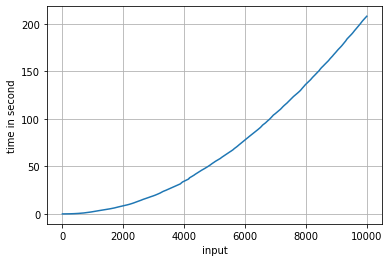

In [12]:
running_time=[]
for i in range(1, 10000):    
    start_time = time.time()
    max_time(np.random.randint(1,26, i))
    running_time.append(time.time() - start_time)

plt.plot(np.cumsum(running_time))
plt.xlabel("input")
plt.ylabel("time in second")
plt.grid()
plt.show()

We can see that our algorithm has an polynomial time, i.e $O(n^k)$, instead of exponential time. This is because we have decided to not build the algorithm with a recursive program since the string is quite long and from this follow that the algorithm will be very time consuming. However, since the function called "maximum_lenght" is based on the idea of LIS (Long Increasing Subsequence) programming, we can show easily show with the following function (which use a recursive program) that we have an exponential time if we use the recursive programme to find the maximum substring in alphabetic order. 

In [17]:
def maximum_length_1(array, n):
    global maximum
    if n == 1 : 
        return 1
    Final_value = 1
    for i in range(1, n): 
        out = maximum_length_1(array , i) 
        if array[i-1] < array[n-1] and out+1 > Final_value: 
            Final_value = out +1
    maximum = max(maximum , Final_value) 
    return Final_value 

def maximum_length_2(array):  
    global maximum 
    maximum = 1
    n = len(array)
    maximum_length_1(array, n) 
    return maximum

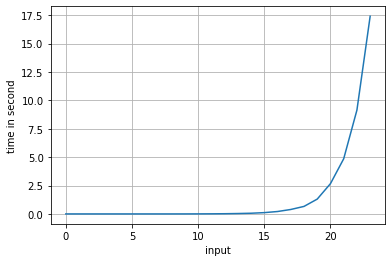

In [18]:
running_time2=[]
for i in range(1, 25):    
    start_time = time.time()
    maximum_length_2(np.random.randint(1,26, i))
    running_time2.append(time.time() - start_time)

plt.plot(np.cumsum(running_time2))
plt.xlabel("input")
plt.ylabel("time in second")
plt.grid()
plt.show()

We can see that the graph shows an exponential time complexity, i.e $O(2^n)$

#### 5.3 Write a program that computes the length of the subsequence of maximum length

In [13]:
# In order to find the maximum lenght of the subsequence we define a function
def maximum_length(array): 
    n = len(array) 
    max_len = [1]*n 
  
    for i in range (1 , n): 
        for j in range(0 , i): 
            if array[i] > array[j] and max_len[i]< max_len[j] + 1 : 
                max_len[i] = max_len[j]+1
  
    # Initialize the count at 0
    maximum = 0
    # Find the maximum 
    for i in range(n): 
        maximum = max(maximum , max_len[i]) 
  
    return maximum 

In [14]:
print ("Length of the maximum subsequence is", maximum_length(array)) 
print( "Length of the array is", len(array))

Length of the maximum subsequence is 11
Length of the array is 31


#### 5.4 What is its runtime complexity?

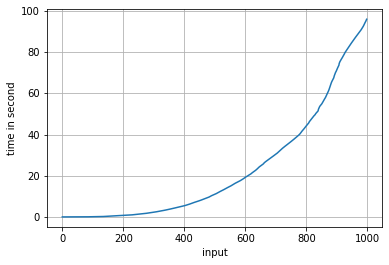

In [16]:
running_time_l=[]
for i in range(1, 1000):    
    start_time = time.time()
    maximum_length(np.random.randint(1,26, i))
    running_time_l.append(time.time() - start_time)

plt.plot(np.cumsum(running_time_l))
plt.xlabel("input")
plt.ylabel("time in second")
plt.grid()
plt.show()

From the graph we can see that the new algorithm (wich find the maximum subsequence) define with a dynamic programming has polynomial time complexity, i.e $O(n^k)$